In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import string
import re
import nltk
import nltk.corpus
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/SEM 3 PROJECTS/SA/Musical_instruments_reviews.csv")

In [ ]:
data

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5.0,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4.0,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made,1404172800,"07 1, 2014"


In [ ]:
data.shape

(10261, 9)

In [ ]:
data.isnull().sum()

,0
reviewerID,0
asin,0
reviewerName,27
helpful,0
reviewText,7
overall,0
summary,0
unixReviewTime,0
reviewTime,0


In [ ]:
data.fillna(value="",inplace=True)

In [ ]:
data.isnull().sum()

,0
reviewerID,0
asin,0
reviewerName,0
helpful,0
reviewText,0
overall,0
summary,0
unixReviewTime,0
reviewTime,0


In [ ]:
data['review']=data["reviewText"] + " " +data["summary"]
data.drop(columns=["reviewText","summary"],axis=1,inplace=True)
data.head(5)

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,review
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac..."
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...


In [ ]:
data.overall.value_counts()

,count
overall,
5.0,6938
4.0,2084
3.0,772
2.0,250
1.0,217


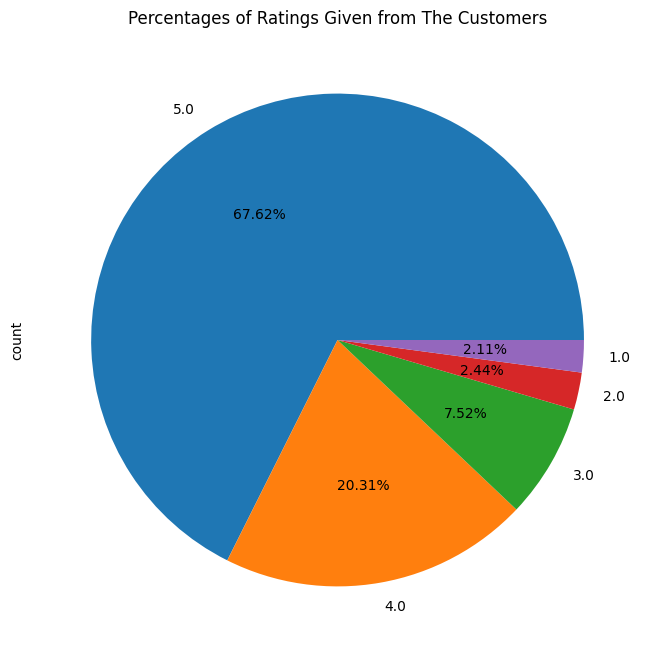

In [ ]:
data.overall.value_counts().plot(kind = "pie", legend = False, autopct = "%1.2f%%", fontsize = 10, figsize=(8,8))
plt.title("Percentages of Ratings Given from The Customers", loc = "center")
plt.show()

In [ ]:
def Labelling(Rows):
  if(Rows["overall"] > 3.0):
    Label = "Positive"
  elif(Rows["overall"] < 3.0):
    Label = "Negative"
  else:
    Label = "Neutral"
  return Label

In [ ]:
data["sentiment"] = data.apply(Labelling, axis = 1)
data

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,review,sentiment
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac...",Positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...,Positive
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...,Positive
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...,Positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...,Positive
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]",5.0,1405814400,"07 20, 2014","Great, just as expected. Thank to all. Five S...",Positive
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",5.0,1404259200,"07 2, 2014",I've been thinking about trying the Nanoweb st...,Positive
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",4.0,1405987200,"07 22, 2014",I have tried coated strings in the past ( incl...,Positive
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]",4.0,1404172800,"07 1, 2014","Well, MADE by Elixir and DEVELOPED with Taylor...",Positive


In [ ]:
data.sentiment.value_counts()

,count
sentiment,
Positive,9022
Neutral,772
Negative,467


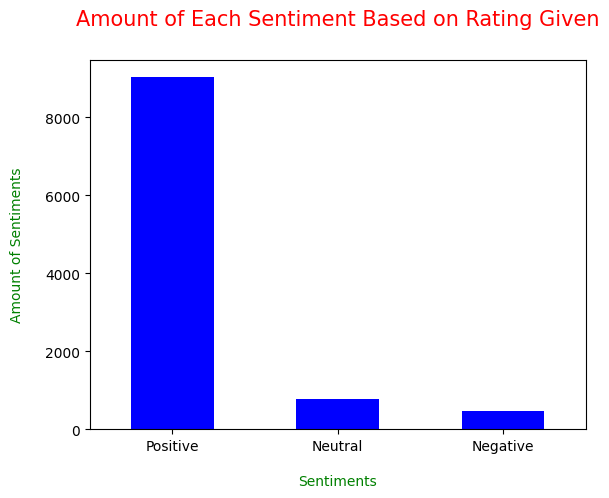

In [ ]:
import matplotlib.pyplot as plt
data["sentiment"].value_counts().plot(kind="bar", color="blue")
plt.title("Amount of Each Sentiment Based on Rating Given", loc="center", fontsize=15, color="red", pad=25)
plt.xlabel("Sentiments", color="green", fontsize=10, labelpad=15)
plt.xticks(rotation=0)
plt.ylabel("Amount of Sentiments", color="green", fontsize=10, labelpad=15)
plt.show()

In [ ]:
data.describe(include = "all")

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,review,sentiment
count,10261,10261,10261,10261,10261.000000,1.026100e+04,10261,10261,10261
unique,1429,900,1398,269,NaN,NaN,1570,10261,3
top,ADH0O8UVJOT10,B003VWJ2K8,Amazon Customer,"[0, 0]",NaN,NaN,"01 22, 2013","Not much to write about here, but it does exac...",Positive
freq,42,163,66,6796,NaN,NaN,40,1,9022
mean,NaN,NaN,NaN,NaN,4.488744,1.360606e+09,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.894642,3.779735e+07,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,1.095466e+09,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.000000,1.343434e+09,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,5.000000,1.368490e+09,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,5.000000,1.388966e+09,NaN,NaN,NaN


In [ ]:
def Text_Cleaning(Text):
  # Lowercase the texts
  Text = Text.lower()

  # Cleaning punctuations in the text
  punc = str.maketrans(string.punctuation, ' '*len(string.punctuation))
  Text = Text.translate(punc)


  # Removing numbers in the text
  Text = re.sub(r'\d+', '', Text)

  # Remove possible links
  Text = re.sub('https?://\S+|www\.\S+', '', Text)

  # Deleting newlines
  Text = re.sub('\n', '', Text)

  return Text

In [ ]:
# Stopwords
Stopwords = set(nltk.corpus.stopwords.words("english")) - set(["not"])

def Text_Processing(Text):
  Processed_Text = list()
  Lemmatizer = WordNetLemmatizer()

  # Tokens of Words
  Tokens = nltk.word_tokenize(Text)

  # Removing Stopwords and Lemmatizing Words
  # To reduce noises in our dataset, also to keep it simple and still
  # powerful, we will only omit the word `not` from the list of stopwords

  for word in Tokens:
    if word not in Stopwords:
      Processed_Text.append(Lemmatizer.lemmatize(word))

  return(" ".join(Processed_Text))

In [ ]:
data["reviews"] = data["review"].apply(lambda Text: Text_Cleaning(Text))
data["reviews"] = data["review"].apply(lambda Text: Text_Processing(Text))


In [ ]:
data

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,review,sentiment,reviews
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac...",Positive,"Not much write , exactly 's supposed . filter ..."
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...,Positive,The product exactly quite affordable.I not rea...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...,Positive,The primary job device block breath would othe...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...,Positive,Nice windscreen protects MXL mic prevents pop ...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...,Positive,This pop filter great . It look performs like ...
...,...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]",5.0,1405814400,"07 20, 2014","Great, just as expected. Thank to all. Five S...",Positive,"Great , expected . Thank . Five Stars"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",5.0,1404259200,"07 2, 2014",I've been thinking about trying the Nanoweb st...,Positive,"I 've thinking trying Nanoweb string , I bit p..."
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",4.0,1405987200,"07 22, 2014",I have tried coated strings in the past ( incl...,Positive,I tried coated string past ( including Elixirs...
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]",4.0,1404172800,"07 1, 2014","Well, MADE by Elixir and DEVELOPED with Taylor...",Positive,"Well , MADE Elixir DEVELOPED Taylor Guitars ....."


In [ ]:
Columns = ["reviewerID", "asin", "reviewerName", "helpful", "unixReviewTime", "reviewTime", "overall","review"]
data.drop(columns = Columns, axis = 1, inplace = True)

In [ ]:
data

,sentiment,reviews
0,Positive,"Not much write , exactly 's supposed . filter ..."
1,Positive,The product exactly quite affordable.I not rea...
2,Positive,The primary job device block breath would othe...
3,Positive,Nice windscreen protects MXL mic prevents pop ...
4,Positive,This pop filter great . It look performs like ...
...,...,...
10256,Positive,"Great , expected . Thank . Five Stars"
10257,Positive,"I 've thinking trying Nanoweb string , I bit p..."
10258,Positive,I tried coated string past ( including Elixirs...
10259,Positive,"Well , MADE Elixir DEVELOPED Taylor Guitars ....."


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

https://docs.google.com/spreadsheets/d/1IU2KbBgJNBYHlFE7Q04MimqQtFjMkwac5C4ttbzpTlc#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
data["sentiment"] = Encoder.fit_transform(data["sentiment"])
data
# Positive is 2, Neutral is 1, and Negative is 0

,sentiment,reviews
0,2,"Not much write , exactly 's supposed . filter ..."
1,2,The product exactly quite affordable.I not rea...
2,2,The primary job device block breath would othe...
3,2,Nice windscreen protects MXL mic prevents pop ...
4,2,This pop filter great . It look performs like ...
...,...,...
10256,2,"Great , expected . Thank . Five Stars"
10257,2,"I 've thinking trying Nanoweb string , I bit p..."
10258,2,I tried coated string past ( including Elixirs...
10259,2,"Well , MADE Elixir DEVELOPED Taylor Guitars ....."


In [ ]:
# TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Defining our vectorizer with total words of 5000 and with bigram model
TF_IDF = TfidfVectorizer(max_features = 5000, ngram_range = (2, 2))

# Fitting and transforming our reviews into a matrix of weighed words
# This will be our independent features
X = TF_IDF.fit_transform(data["reviews"])

# Check our matrix shape
X.shape

(10261, 5000)

In [ ]:
X

<10261x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 110054 stored elements in Compressed Sparse Row format>

In [ ]:
# Declaring our target variable
y = data["sentiment"]


In [ ]:
# Resampling
from imblearn.over_sampling import SMOTE
from collections import Counter
# Splitting Dataset
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
from sklearn.linear_model import LogisticRegression
# Apply SMOTE to balance the dataset
Balancer = SMOTE(random_state=42)
X_final, y_final = Balancer.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.25, random_state=42)

# Initialize and train Logistic Regression model
Classifier = LogisticRegression(random_state=42, C=6866.488450042998, penalty='l2')
Classifier.fit(X_train, y_train)

# Calculate cross-validated accuracy for Logistic Regression
LogReg = LogisticRegression(random_state=42)
cross_val_accuracy = cross_val_score(LogReg, X_final, y_final, cv=10, scoring='accuracy').mean()
print("Logistic Regression Cross-Validation Accuracy: {:.2f}".format(cross_val_accuracy))

# Evaluate on the test set
test_accuracy = Classifier.score(X_test, y_test)
print("Logistic Regression Test Accuracy: {:.2f}".format(test_accuracy))

# Make predictions on the test set
Prediction = Classifier.predict(X_test)
print("Predictions on Test Set:", Prediction)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Cross-Validation Accuracy: 0.90
Logistic Regression Test Accuracy: 0.96
Predictions on Test Set: [0 2 0 ... 0 2 0]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Balancer = SMOTE(random_state = 42)
# X_final, y_final = Balancer.fit_resample(X, y)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.25, random_state = 42)

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import cross_val_score

# # Assuming X and y are already defined
# LogReg = LogisticRegression()

# # Calculate cross-validated test accuracy for Logistic Regression
# accuracy = cross_val_score(LogReg, X, y, cv=10, scoring='accuracy').mean()

# print("Logistic Regression Test Accuracy: {}".format(accuracy))


In [ ]:
# Classifier = LogisticRegression(random_state = 42, C = 6866.488450042998, penalty = 'l2')
# Classifier.fit(X_train, y_train)

# Prediction = Classifier.predict(X_test)

In [ ]:
# Function to preprocess and predict new reviews
def predict_sentiment(new_review):
    # Cleaning the review
    new_review_cleaned = Text_Cleaning(new_review)

    # Processing the cleaned review
    new_review_processed = Text_Processing(new_review_cleaned)

    # Debug print to check the processed review
    print("Processed Review:", new_review_processed)

    # Transforming the processed review into a TF-IDF vector
    new_review_tfidf = TF_IDF.transform([new_review_processed])

    # Predicting the sentiment using the classifier
    sentiment = Classifier.predict(new_review_tfidf)

    # Returning the predicted sentiment label
    return Encoder.inverse_transform(sentiment)[0]

# Example usage
new_review = "It inexpensive difficult use anywhere noise .. I used several year backup .. Nice part calibrate tuning , although probably would not used musician .. Other I think money would better spent headstock type tuner .. I would not recommend . not best choice"
predicted_sentiment = predict_sentiment(new_review)
print("Predicted Sentiment:", predicted_sentiment)
print("Sentiment values: Positive is 2, Neutral is 1, and Negative is 0")


Processed Review: inexpensive difficult use anywhere noise used several year backup nice part calibrate tuning although probably would not used musician think money would better spent headstock type tuner would not recommend not best choice
Predicted Sentiment: Negative
Sentiment values: Positive is 2, Neutral is 1, and Negative is 0


In [ ]:
# import joblib

# # Save the model, TF-IDF vectorizer, and label encoder
# joblib.dump(Classifier, 'logistic_regression_model.pkl')
# joblib.dump(TF_IDF, 'tfidf_vectorizer.pkl')
# joblib.dump(Encoder, 'label_encoder.pkl')


In [ ]:
# Install required packages
!pip install scikit-learn flask

import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

# Assuming you have your models and transformers ready
# Save TF-IDF Vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(TF_IDF, f)

# Save Label Encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(Encoder, f)

# Save Logistic Regression Model
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(Classifier, f)

# Download the files to your local machine
from google.colab import files
